# LAB2 - Drzewa decyzyjne

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz SzydĹo

kontakt: tszydlo@agh.edu.pl

# Wprowadzenie

Drzewa decyzyjne (DT) to nadzorowana metoda uczenia stosowana do problemu klasyfikacji i regresji. Celem jest stworzenie modelu, ktĂłry przewiduje wartoĹÄ zmiennej docelowej poprzez naukÄ prostych reguĹ decyzyjnych wywnioskowanych z danych.

Zalety drzew decyzyjnych to:
* Ĺatwe do zrozumienia i wizualizacji;
* wymagajÄ niewielkiego przygotowania danych;
* koszt korzystania z drzewa (tj. przewidywania danych) jest logarytmiczny;
* drzewa decyzyjne sÄ w znacznym stopniu interpretowalne tzn. moĹźliwe jest wyjaĹnienie jakie wĹasnoĹci danych wejĹciowych przyczyniĹy siÄ do uzyskania wyniku.

Wady drzew decyzyjnych obejmujÄ:
* proces uczenia drzew decyzyjnych moĹźe tworzyÄ nadmiernie zĹoĹźone drzewa, ktĂłre nie generalizujÄ dobrze danych;
* drzewa decyzyjne mogÄ byÄ niestabilne, poniewaĹź niewielkie rĂłĹźnice w danych mogÄ spowodowaÄ wygenerowanie zupeĹnie innego drzewa;
* istniejÄ pojÄcia trudne do nauczenia, poniewaĹź drzewa decyzyjne nie wyraĹźajÄ ich Ĺatwo, takie jak XOR.

## Drzewa decyzyjne - przykĹad na zbiorze Iris

ZbiĂłr danych *iris*  zawiera 150 instancji opisujÄcych kwiaty Irysa. Kwiaty sÄ okreĹlone przy pomocy 4 atrybutĂłw numerycznych opisujÄcych dĹugoĹci i szerokoĹci pĹatkĂłw kwiatu *sepal* i *petal*. Ostatni atrybut jakoĹciowy definiuje gatunek opisywanego Irysa (species). Jednym z problemĂłw moĹźliwych do rozwiÄzania przy uĹźyciu tego zbioru uczÄcego jest okreĹlenie gatunku dla nowego kwiatu Irysa w zaleĹźnoĹci od wielkoĹci jego pĹatkĂłw. Jest to przykĹad zadania klasyfikacji.

ZbiĂłr uczÄcy *iris* jest zbiorem etykietowanym poniewaĹź klasa, czyli konkretny gatunek irysa jest znany dla kaĹźdej instancji (obiektu) w zbiorze uczÄcym:

https://archive.ics.uci.edu/ml/datasets/iris

```
Source:

Creator:

R.A. Fisher

Donor:

Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
```


In [46]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

%matplotlib inline

iris = load_iris()

X, y = load_iris(return_X_y=True)

print('Class labels:', np.unique(y))

print(X)
print(y)

Class labels: [0 1 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

In [47]:
# przygotowanie danych treningowych

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [48]:
# uczenie modelu
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [49]:
# jakoĹÄ modelu
clf.score(X_test, y_test)

0.9777777777777777

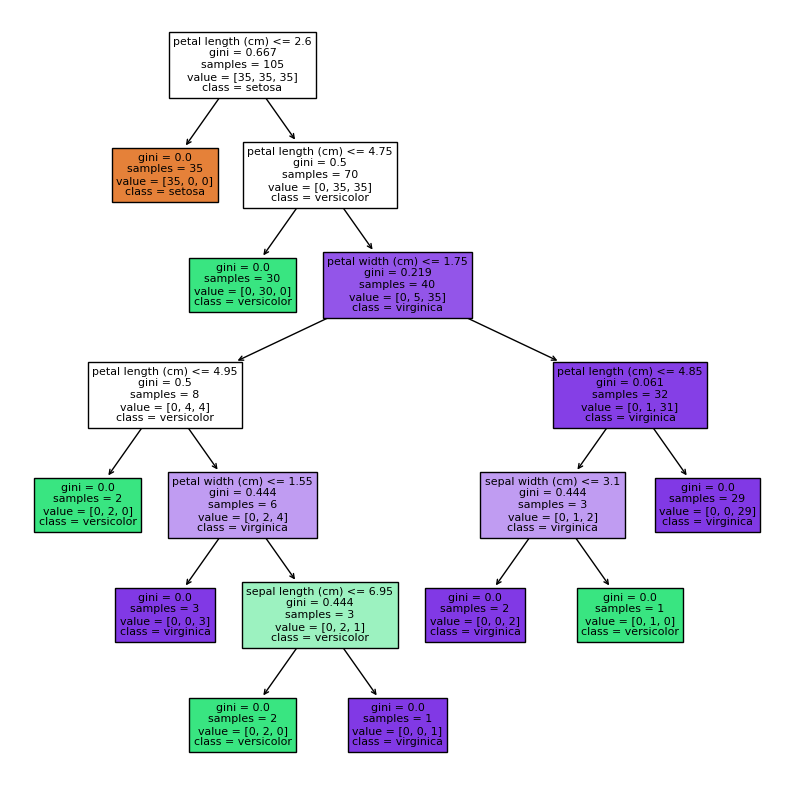

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# System komputerowy - Interpretacja drzew decyzyjnych

Drzewo decyzyjne zostanie opracowane w celu predykcji kodu bĹÄdu odpowiedzi serwera WWW w sieci lokalnej. Dodatkowo, na podstawie analizy drzewa decyzyjnego zostanÄ zidentyfikowane urzÄdzenia z uszkodzonymi kartami sieciowymi skutkujÄce bĹÄdnymi odpowiedziami serwera.

System komputerowy jest opisany modelem, ktĂłry posĹuĹźy do wygenerowania danych treningowych.

## Model systemu komputerowego

System komputerowy skĹada siÄ z 4 komputerĂłw (C1-C4) oraz czterech serwerĂłw WWW (WWW1-WWW4). ZakĹada siÄ, Ĺźe komputery ĹźÄdajÄ dostÄpu do treĹci na serwerach WWW. ZarĂłwno komputery jak i serwery majÄ uszkodzone w rĂłĹźnym stopniu karty sieciowe skutkujÄce niepoprawnymi ĹźÄdaniami dostÄpu do treĹci.

Funkcja *get_log()* zwraca trĂłjkÄ *(komputer_klienta, serwer, kod_bledu)*.

In [51]:
import random

computers = ["C1", "C2", "C3", "C4"]
sites = ["WWW1", "WWW2", "WWW3", "WWW4"]
errors = ["200", "418"]

In [52]:
#model systemu komputerowego
random.seed(42)

def get_log():
    c = random.randrange(len(computers))
    s = random.randrange(len(sites))

    if ( (0.2983*c*c*c - 1.195*c*c + 0.8967*c + 0.9) * (-0.125*s*s*s + 0.445*s*s - 0.44*s + 0.99)) < random.random():
        e=1
    else:
        e=0

    return (computers[c], sites[s], errors[e])


In [53]:
print(get_log())

('C1', 'WWW1', '200')


## Przygotowanie danych treningowych

Funkcja *get_log()* zostanie wykorzystana do przygotowania zbioru testowego zĹoĹźonego z *N* logĂłw.

PrzykĹadowo dla logĂłw: ('C2', 'WWW2', '200'), ('C1', 'WWW3', '418'), ...

Tablice z danymi uczÄcymi powinny zawieraÄ odpowiednio:
 * CS_X -> (1, 1), (0, 2), ...
 * CS_y -> 200, 418, ...



In [54]:
N = 50

CS_X = []
CS_y = []

mapped_computers = {computers[i]: i for i in range(len(computers))}
mapped_servers = {sites[i]:i for i in range(len(sites))}

for n in range(N):
    triple = get_log()

    #TODO
    CS_y.append(triple[2])
    CS_X.append((mapped_computers[triple[0]], mapped_servers[triple[1]]))



Wypisz dane treningowe.

In [55]:
for elem in list(zip(CS_X, CS_y)):
  print(f"CS_X:{elem[0][0], elem[0][1]}")
  print(f"CS_y: {elem[1]}")
  print("------------------------")

CS_X:(1, 1)
CS_y: 200
------------------------
CS_X:(0, 0)
CS_y: 200
------------------------
CS_X:(0, 0)
CS_y: 200
------------------------
CS_X:(1, 0)
CS_y: 200
------------------------
CS_X:(3, 1)
CS_y: 200
------------------------
CS_X:(2, 0)
CS_y: 418
------------------------
CS_X:(1, 3)
CS_y: 418
------------------------
CS_X:(1, 1)
CS_y: 418
------------------------
CS_X:(2, 0)
CS_y: 200
------------------------
CS_X:(0, 2)
CS_y: 418
------------------------
CS_X:(2, 0)
CS_y: 418
------------------------
CS_X:(0, 3)
CS_y: 200
------------------------
CS_X:(2, 2)
CS_y: 418
------------------------
CS_X:(0, 0)
CS_y: 200
------------------------
CS_X:(2, 0)
CS_y: 418
------------------------
CS_X:(0, 3)
CS_y: 418
------------------------
CS_X:(2, 1)
CS_y: 418
------------------------
CS_X:(1, 2)
CS_y: 200
------------------------
CS_X:(0, 1)
CS_y: 200
------------------------
CS_X:(1, 1)
CS_y: 200
------------------------
CS_X:(2, 1)
CS_y: 418
------------------------
CS_X:(0, 1)
C

Zbuduj drzewo decyzyjne z wykorzystaniem biblioteki *sklearn*, a nastÄpnie zwizualizuj drzewo decyzyjne. Kod sĹuĹźÄcy do wizualizacji drzewa jest analogiczny jak w przykĹadzie dla zbioru IRIS.

In [56]:
cs_clf = tree.DecisionTreeClassifier()
cs_clf = cs_clf.fit(CS_X, CS_y)

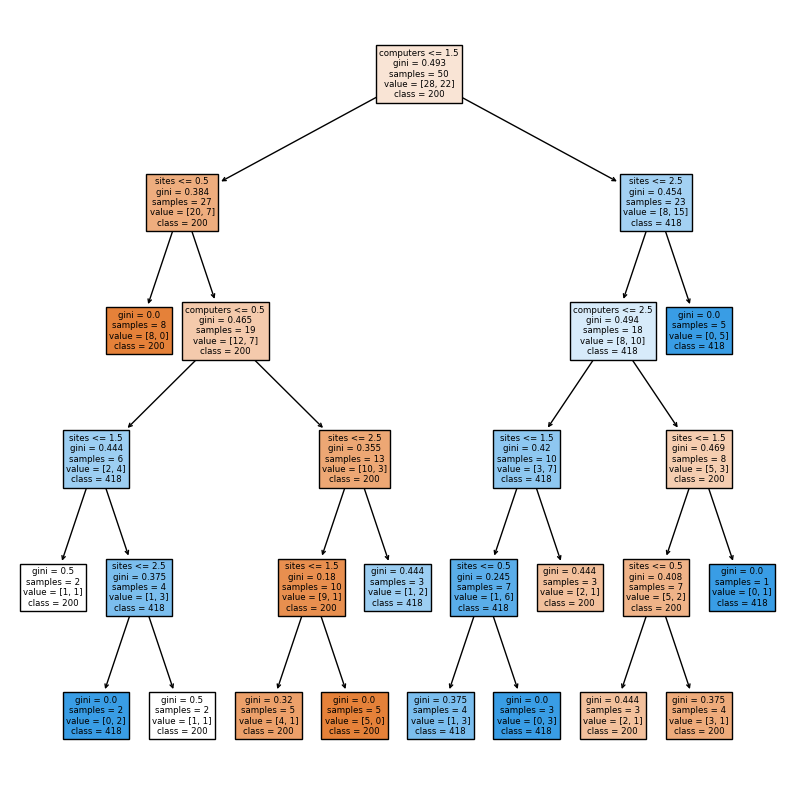

In [57]:
features = ["computers", "sites"]

plt.figure(figsize=(10, 10))
tree.plot_tree(cs_clf, filled=True, feature_names=features, class_names=errors)
plt.show()

Czy uzyskane drzewo decyzyjne jest odpowiednie do rodzaju danych wejĹciowych?

**UWAGA!**

Algorytm budowy drzew decyzyjnych z biblioteki *sklearn* nie pozwala na stosowanie cech jakoĹciowych (categorical data) w wektorze wejĹciowym - issue #5442.

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

_The recommended approach of using Label Encoding converts to integers which the DecisionTreeClassifier() will treat as numeric. If your categorical data is not ordinal, this is not good - you'll end up with splits that do not make sense._

_Using a OneHotEncoder is the only current valid way, allowing arbitrary splits not dependent on the label ordering, but is computationally expensive._

UzupeĹnij kod dokonujÄcy transformacji danych wejĹciowych zgodnie z metodÄ *OneHotEncoding*.


In [58]:
#features_onehot = ["C1", "C2", "C3", "C4", "WWW1", "WWW2", "WWW3", "WWW4"]

features_onehot = computers + sites

CS_X_onehot=[]

for pc, serv in CS_X:
  base = [0 for _ in range(len(features_onehot))]
  base[pc] = 1
  base[serv+4] = 1
  CS_X_onehot.append(base)




Wypisz dane wejĹciowe.

In [59]:
print(CS_X_onehot)

[[0, 1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0

KorzystajÄc z danych uczÄcych *CS_X_onehot, CS_y* zbuduj drzewo decyzyjne,a nastÄpnie je zwizualizuj.

In [60]:
cs_clf_onehot = tree.DecisionTreeClassifier()
cs_clf_onehot = cs_clf_onehot.fit(CS_X_onehot, CS_y)


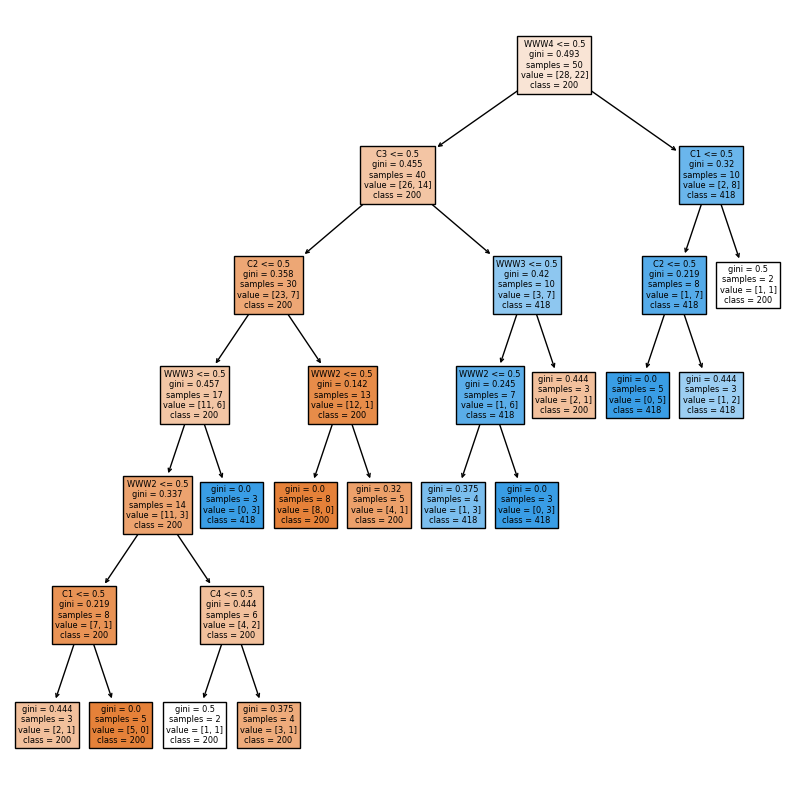

In [61]:
features_onehot = computers + sites

plt.figure(figsize=(10, 10))
tree.plot_tree(cs_clf_onehot, filled=True, feature_names=features_onehot, class_names=errors)
plt.show()

SprawdĹş jak zmienia siÄ ksztaĹt drzewa decyzyjnego dla rĂłĹźnych wartoĹci parametrĂłw przekazywanych do konstruktora *DecisionTreeClassifier(...)*:
 * max_depth    
 * min_samples_leaf

Dodaj te parametry podczas tworzenia klasyfikatora. Wnioski opisz poniĹźej.

In [62]:
max_depths = [1, 2, 4, 6]
min_samples_leaf = [1,2, 4,6]

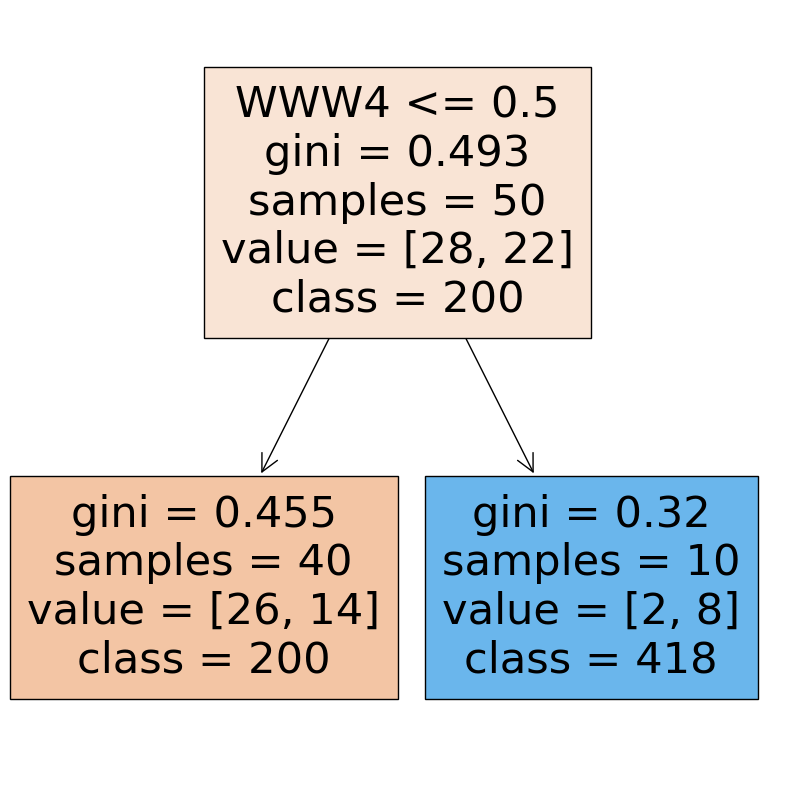

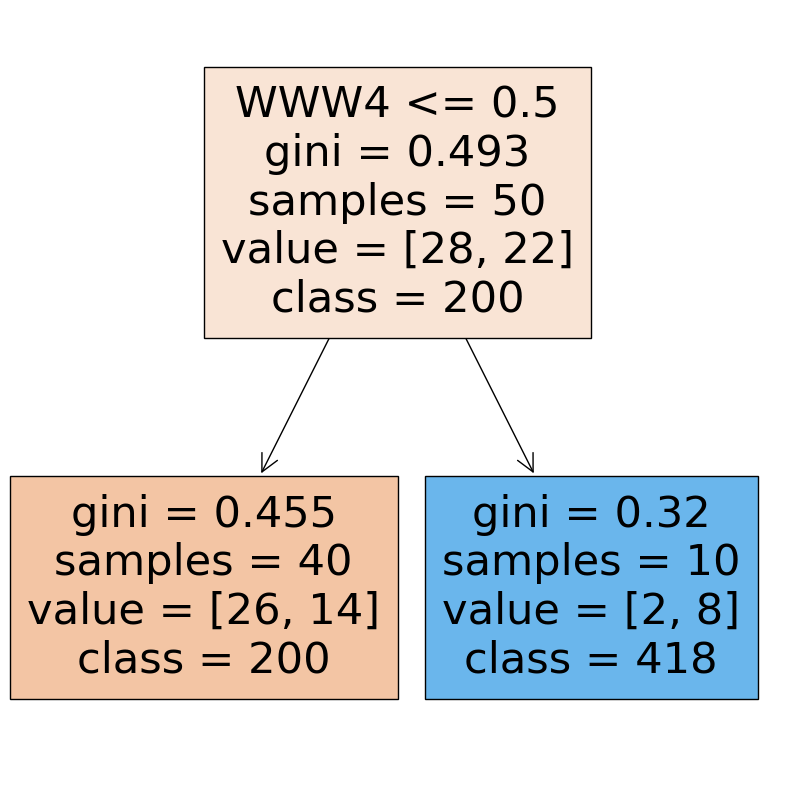

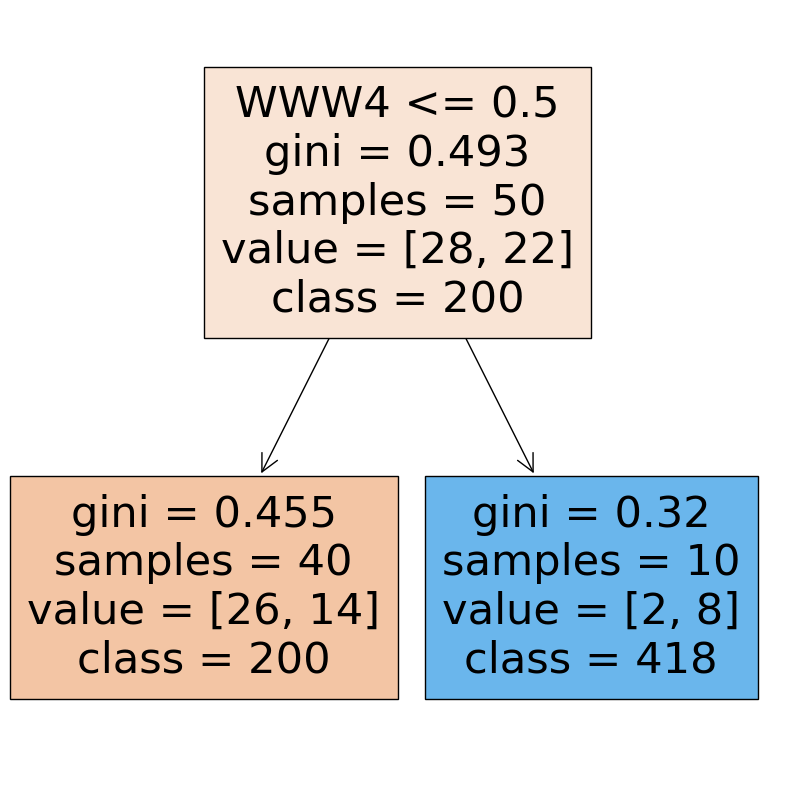

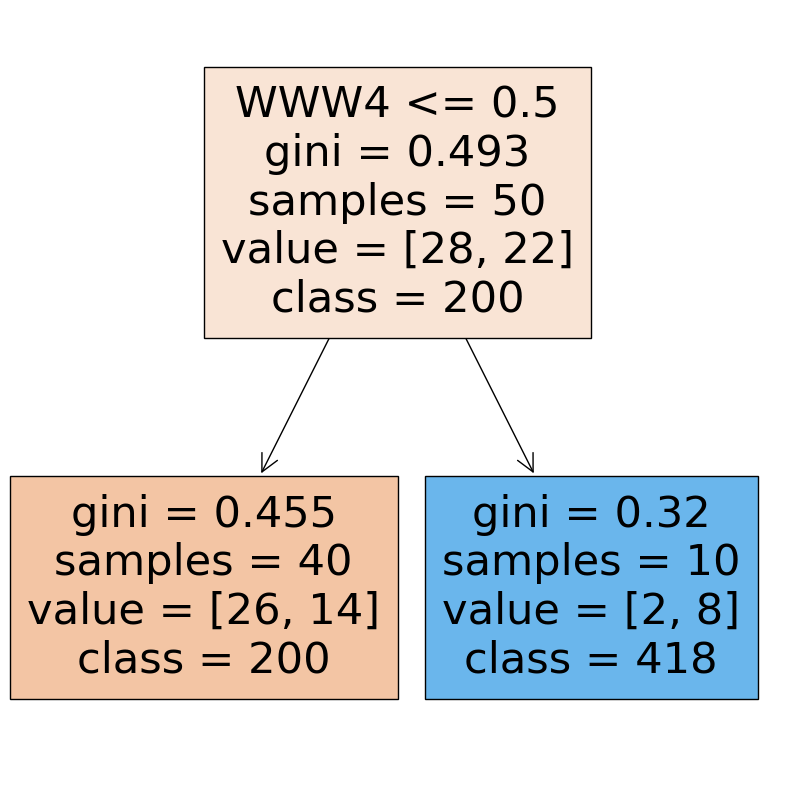

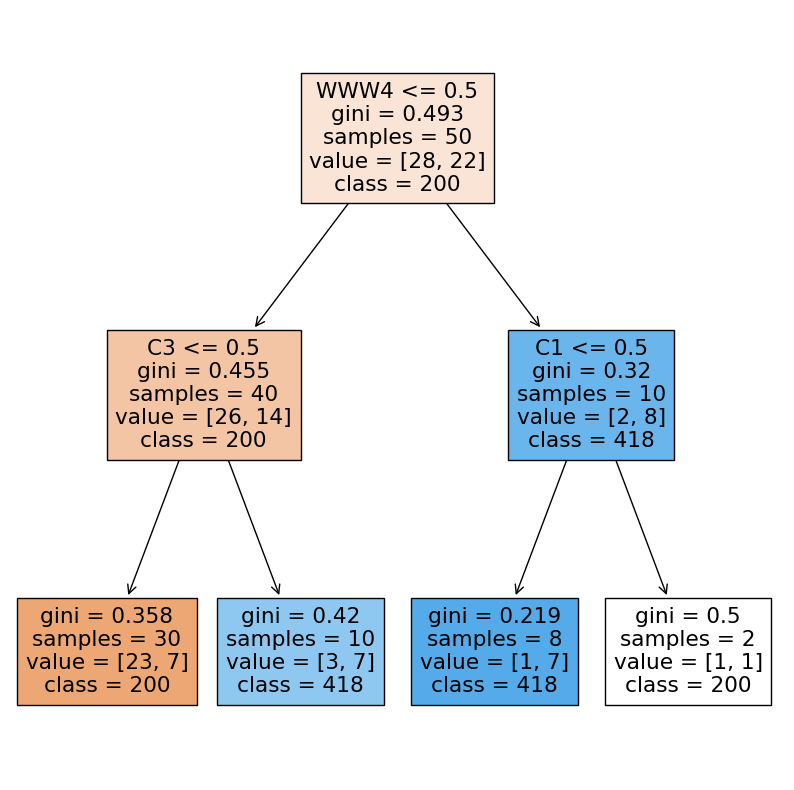

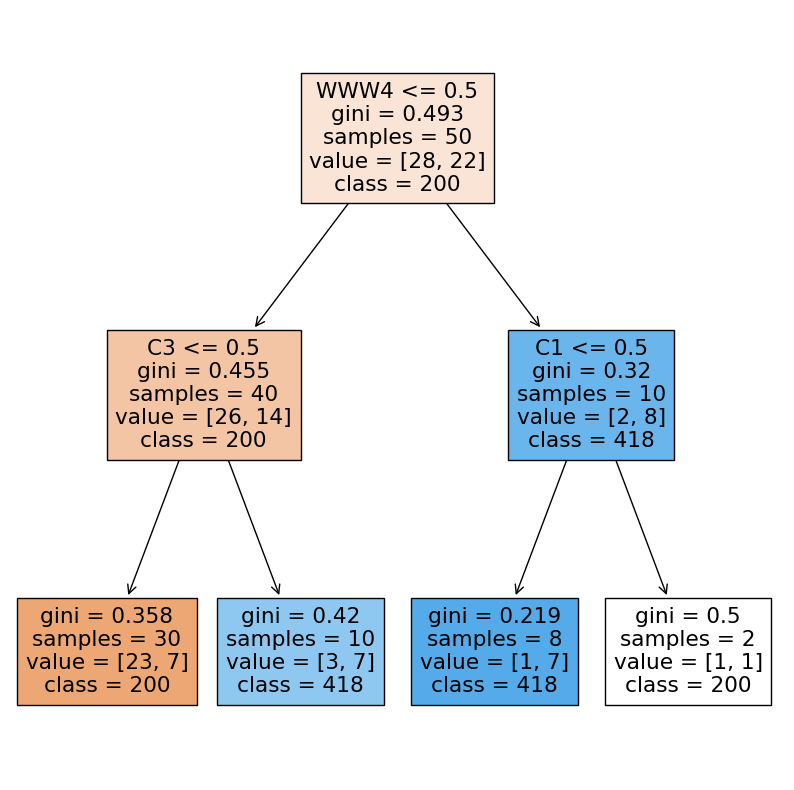

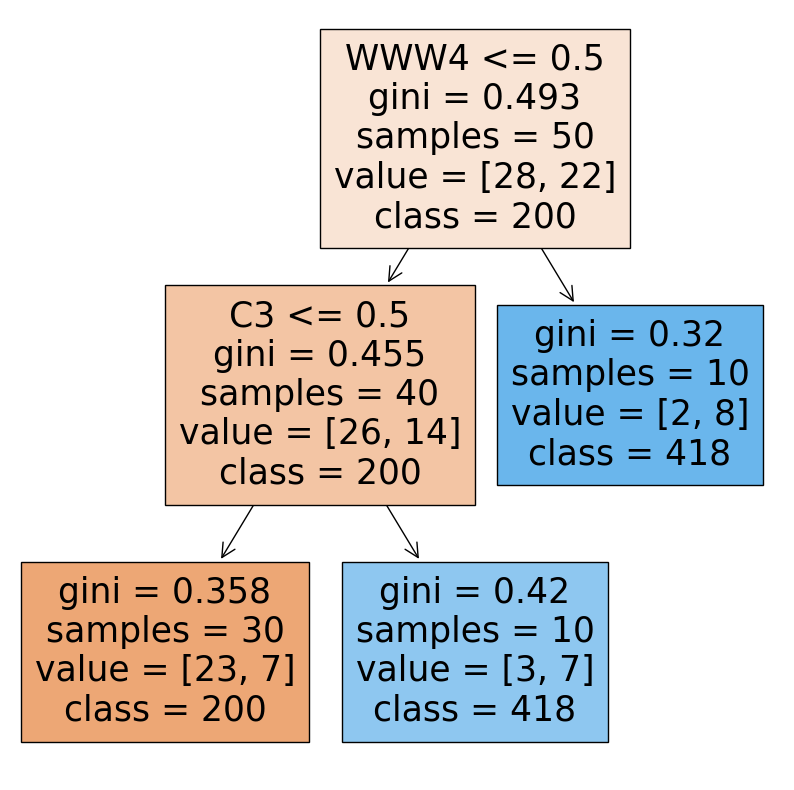

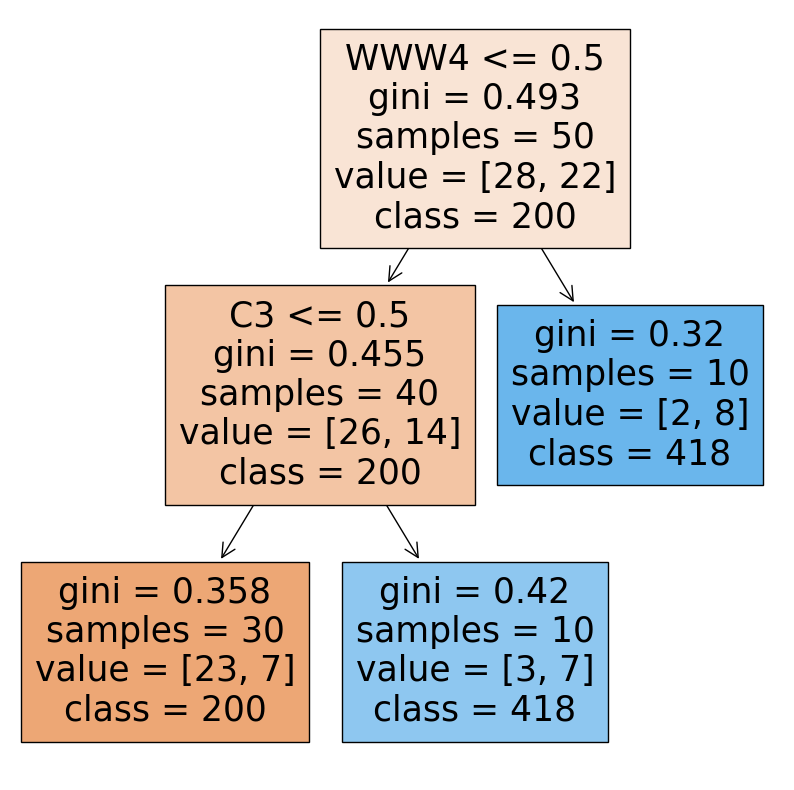

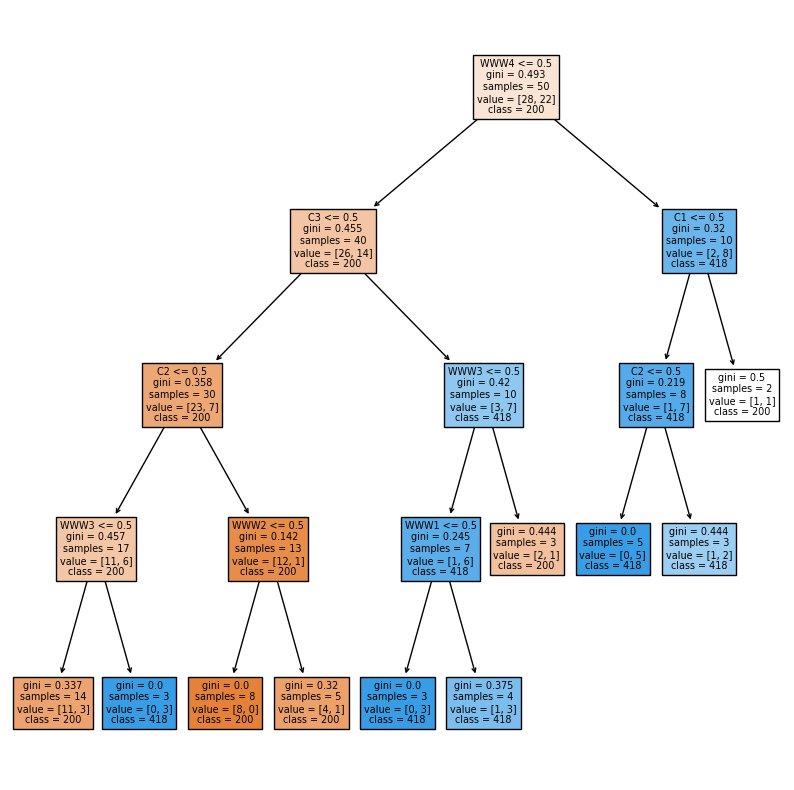

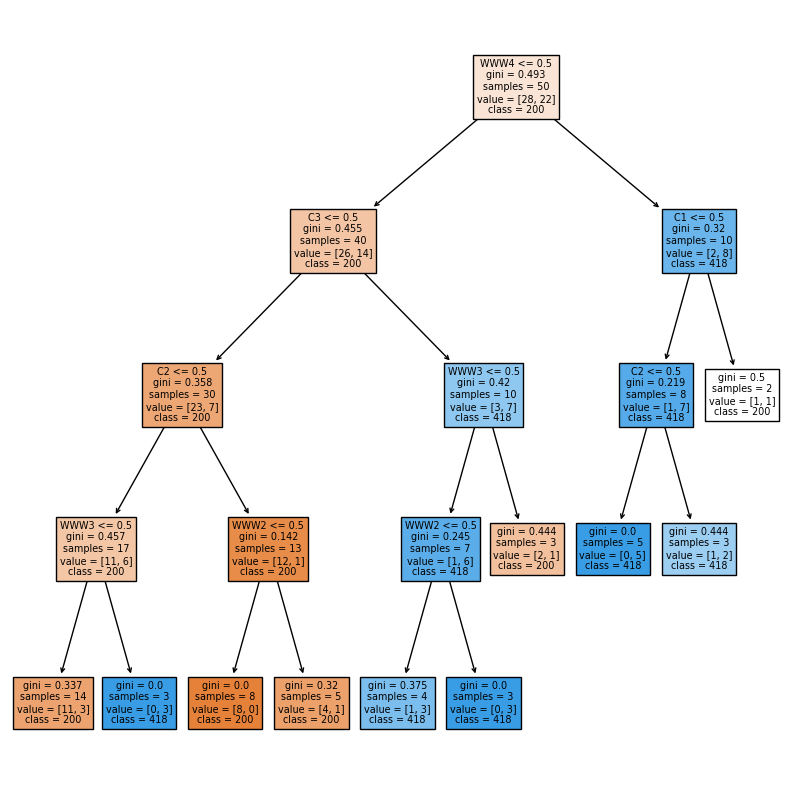

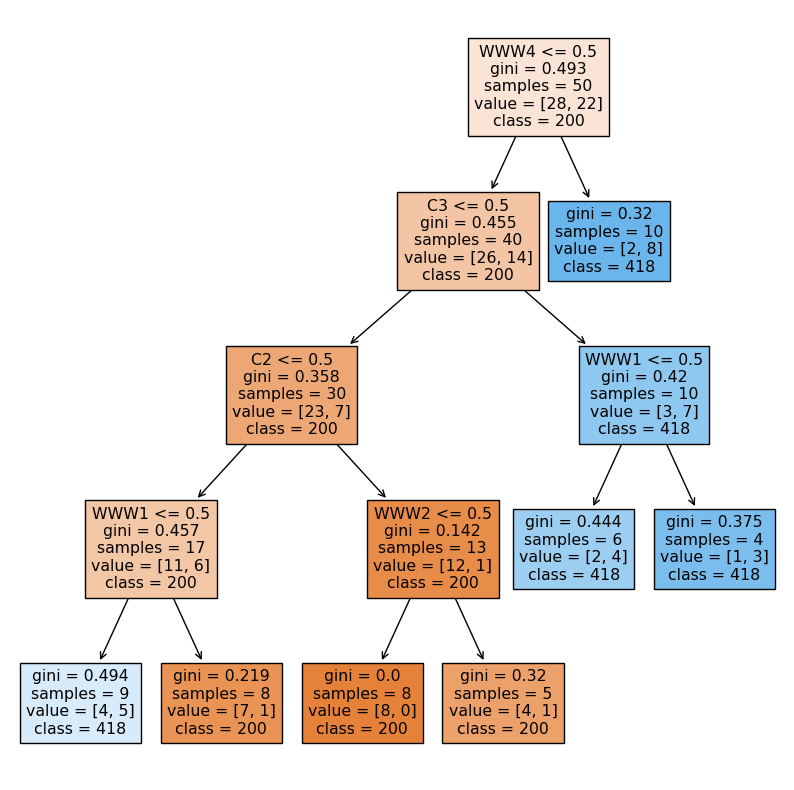

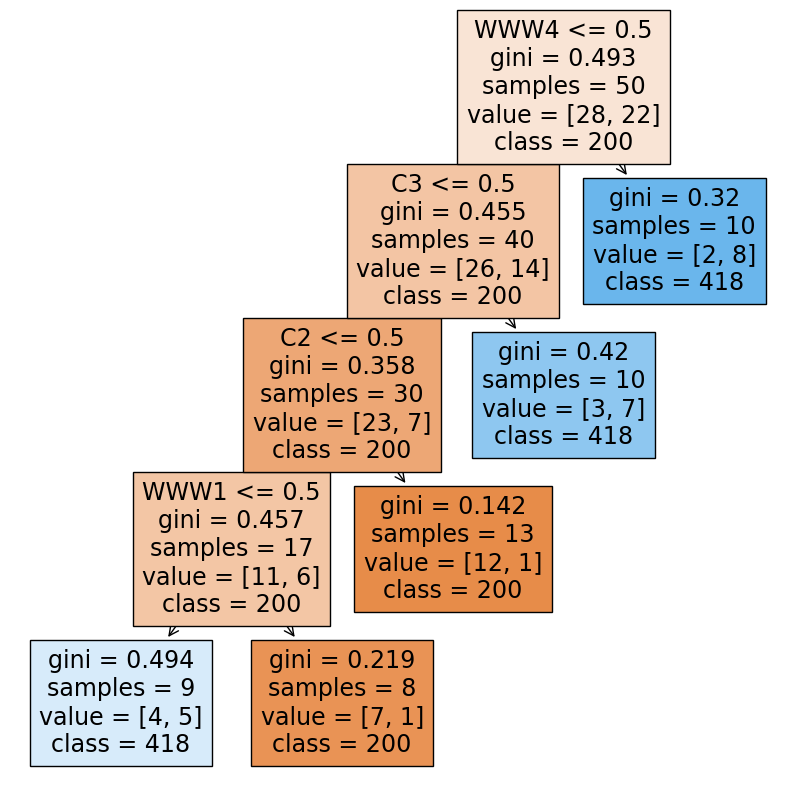

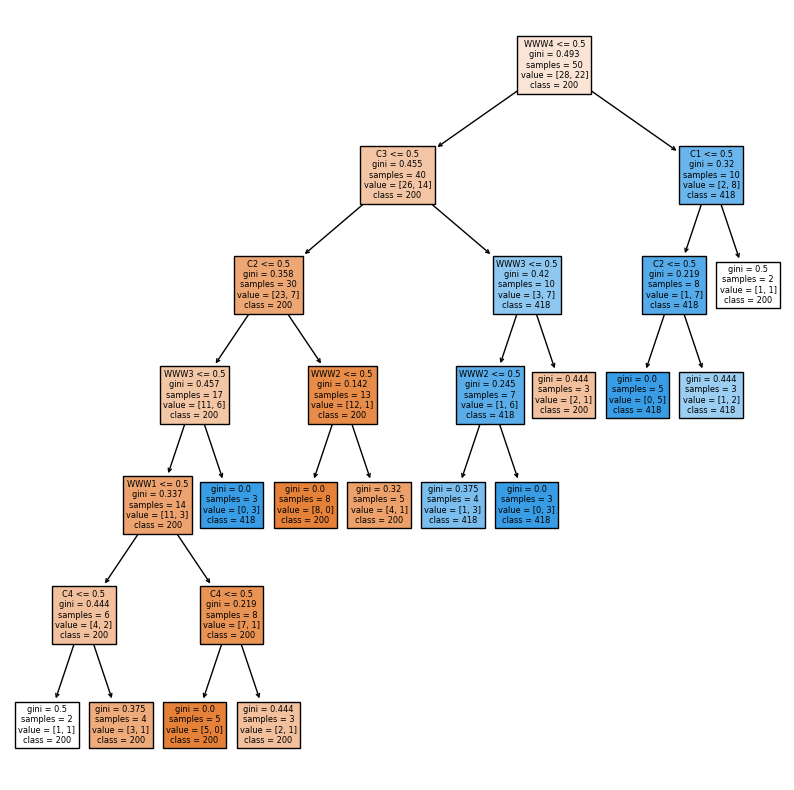

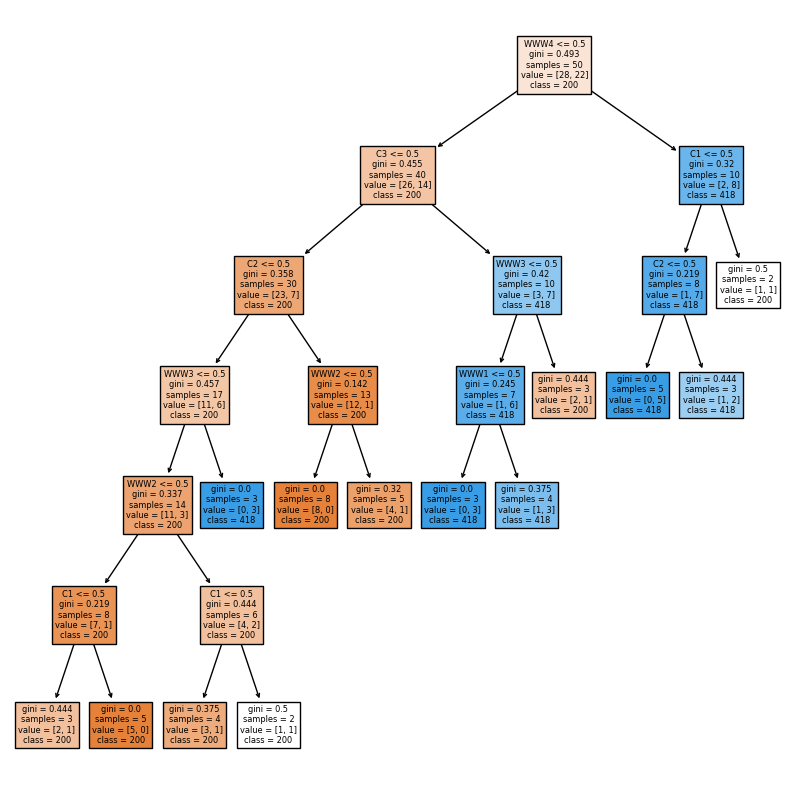

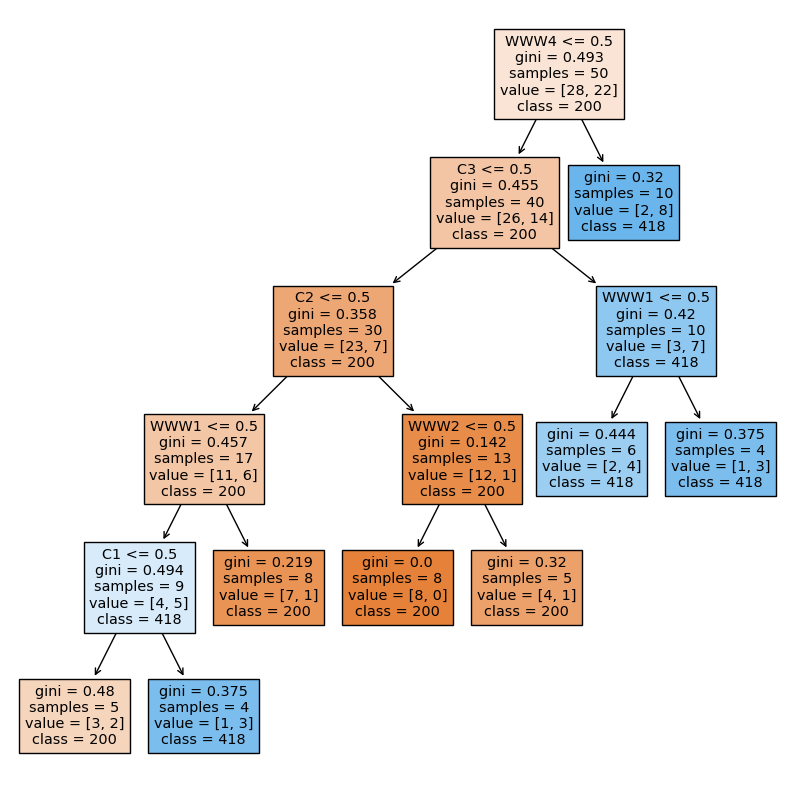

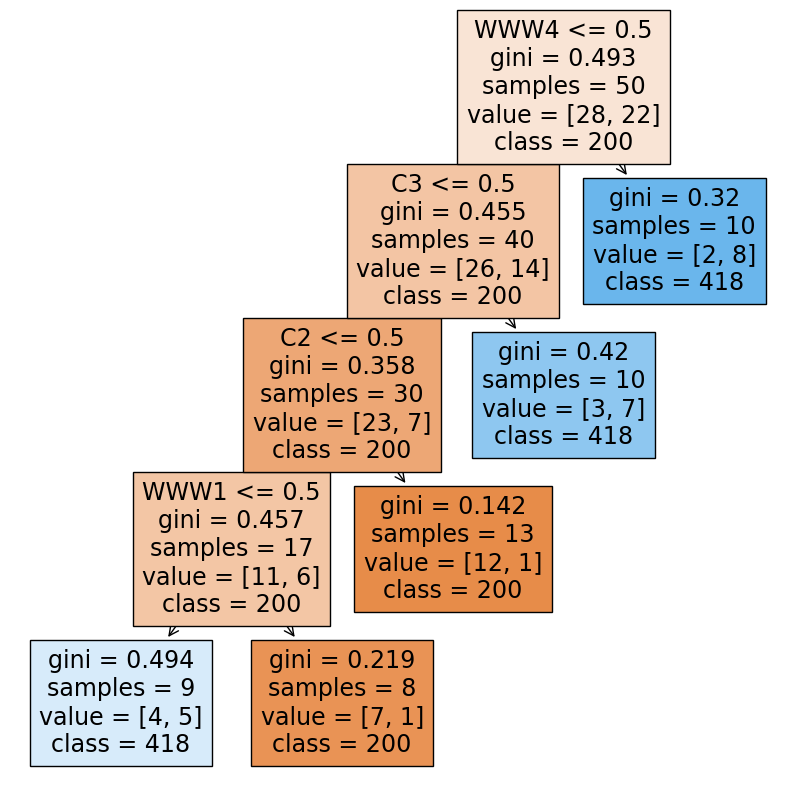

In [63]:
for depth in max_depths:
  for leaf in min_samples_leaf:
    cs_clf_onehot = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
    cs_clf_onehot = cs_clf_onehot.fit(CS_X_onehot, CS_y)

    plt.figure(figsize=(10, 10))
    tree.plot_tree(cs_clf_onehot, filled=True, feature_names=features_onehot, class_names=errors)
    plt.show()

**Jaki wpĹyw na ksztaĹt drzewa ma parametr *max_depth*?**
Im wiÄkszy parametr max_depth tym drzewo moĹźe potencjalnie osiÄgnÄÄ wiÄkszÄ gĹÄbokoĹÄ. W naszym zbiorze jest za maĹo cech Ĺźeby osiÄgnÄÄ bardzo duĹźe gĹÄbokoĹcim, ale dla odpowiednio maĹych wartoĹci juĹź widaÄ rĂłĹźnicÄ.

**Jaki wpĹyw na ksztaĹt drzewa ma parametr *min_samples_leaf*?**
Ten parametr determinuje minimalnÄ iloĹÄ prĂłbek ze zbioru, ktĂłre majÄ siÄ znaleĹşÄ w liĹciu drzewa, zatem im wiÄksza wartoĹÄ, tym potencjalnie drzewo bÄdzie pĹytsze i jeĹli wartoĹÄ bedzie mniejsza (minimalnie 1), tym drzewo moĹźe byÄ potencjalnie gĹÄbsze.

Przyjmij wartoĹci parametrĂłw odpowiednio: ***max_depth=3***, ***min_samples_leaf=5***. Przeanalizuj ksztaĹt drzewa i odpowiedz na pytania poniĹźej.

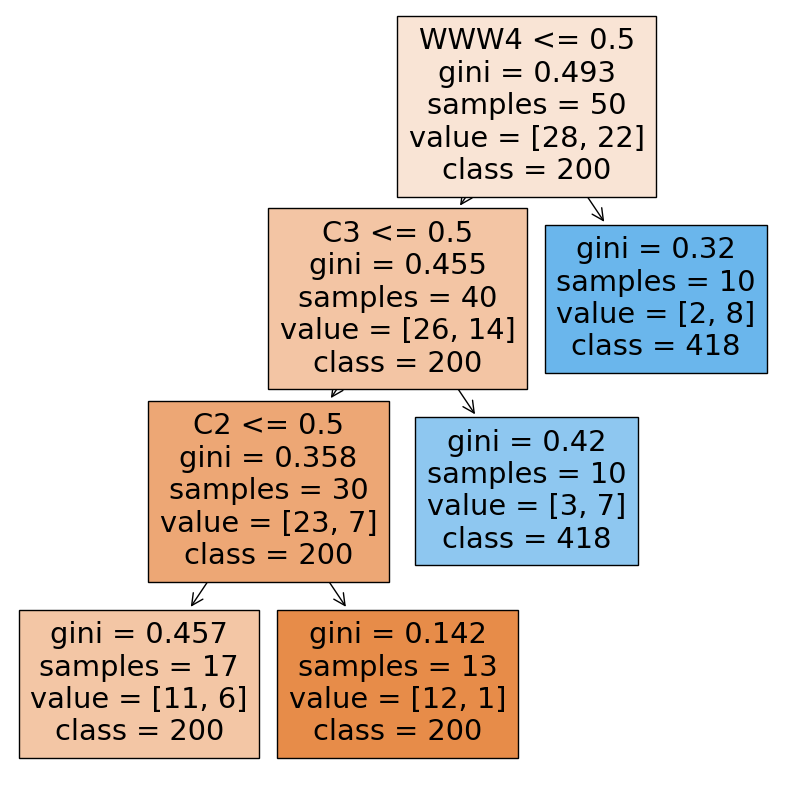

In [64]:
    cs_clf_onehot = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
    cs_clf_onehot = cs_clf_onehot.fit(CS_X_onehot, CS_y)

    plt.figure(figsize=(10, 10))
    tree.plot_tree(cs_clf_onehot, filled=True, feature_names=features_onehot, class_names=errors)
    plt.show()

**KtĂłry z komputerĂłw ma wadliwÄ kartÄ sieciowÄ?**\
C3

**KtĂłry z serwerĂłw ma wadliwÄ kartÄ sieciowÄ?**\
WWW4

In [77]:
def accuracy(y_true, y_pred) -> float:
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return (tp + tn)/(tn + fp + fn + tp)

In [78]:
def sensitivity(y_true, y_pred) -> float:
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tp / (tp + fn)

In [79]:
def specitivity(y_true, y_pred) -> float:
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tn / (tn + fp)

Confusion matrix with TP, FP, FN, TN
|TP=15|FP=5|
---------
|FN=7|TN=23|
--------------------------------------------
Many classes confusion matrix, in example above 418 is assumed as positve and 200 as negative


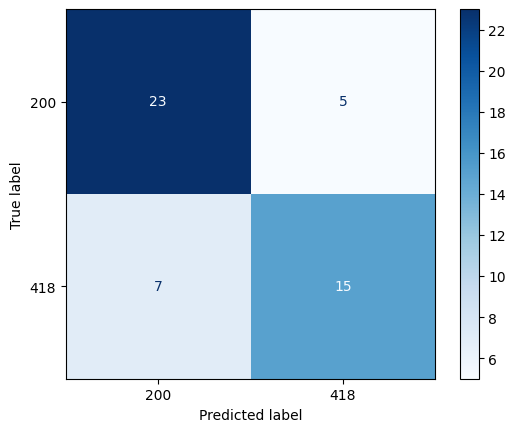

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

classes = errors

preds = cs_clf_onehot.predict(CS_X_onehot)

cm = confusion_matrix(CS_y, preds, labels=classes)
tn, fp, fn, tp = confusion_matrix(CS_y, preds).ravel()
print("Confusion matrix with TP, FP, FN, TN")
print(f"|TP={tp}|FP={fp}|\n---------\n|FN={fn}|TN={tn}|")
print("--------------------------------------------")
print("Many classes confusion matrix, in example above 418 is assumed as positve and 200 as negative")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap="Blues")
plt.show()

In [80]:
print("Scores for tested model")
acc = accuracy(CS_y, preds)
sens = sensitivity(CS_y, preds)
spec = specitivity(CS_y, preds)
print(f"Accuracy: {acc}")
print("------------------------")
print(f"Sensitivity: {sens}")
print("------------------------")
print(f"Specitivity: {spec}")
print("------------------------")

Scores for tested model
Accuracy: 0.76
------------------------
Sensitivity: 0.6818181818181818
------------------------
Specitivity: 0.8214285714285714
------------------------
